<a href="https://colab.research.google.com/github/atsuvovor/CyberThreat_Insight/blob/main/production%20/stacked_ad_classifier_prod01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  CyberThreat-Insight – Anomalous Behavior Detection in Cybersecurity Analytics using Generative AI  
##End User Documentation

**Toronto, Sept 17 202**  
**Autor : Atsu Vovor**
>Master of Management in Artificial Intelligence      
>Consultant Data Analytics Specialist | Machine Learning | Data   science | Quantitative Analysis |French & English Bilingual   



**Project:** Stacked Anomaly Detection Classifier  
**Model Type:** Stacked Supervised Classifier with Unsupervised Anomaly Features  

---

## 1. Introduction

The **Stacked Anomaly Detection Classifier** is a pretrained cybersecurity analytics model designed to detect anomalous or malicious behavior in security datasets. It leverages multiple unsupervised anomaly detection models (Isolation Forest, One-Class SVM, Local Outlier Factor, DBSCAN, KMeans, Dense Autoencoder, LSTM Autoencoder) to generate anomaly features. These features are then stacked with the original data and fed into a supervised ensemble (Random Forest + Gradient Boosting) for multi-class classification.

The model predicts **Threat Level** for each record:

* **0 = Low**
* **1 = Medium**
* **2 = High**
* **3 = Critical**

---

## 2. System Specifications

To run inference successfully, ensure the following system setup:

### Hardware Requirements

* CPU: Quad-core (Intel i5/Ryzen 5 or better)
* RAM: Minimum 16 GB (32 GB recommended for large datasets)
* Storage: At least 5 GB free disk space
* GPU (Optional): NVIDIA GPU with CUDA/cuDNN for faster Autoencoder & LSTM inference

### Software Requirements

* **Operating System:** Linux (Ubuntu 20.04+), macOS 12+, or Windows 10/11

* **Python:** Version 3.9 – 3.12

* **Libraries (install via pip):**

  ```bash
  pip install numpy pandas scikit-learn tensorflow seaborn matplotlib joblib
  ```

* **Google Colab / Jupyter Notebook (Optional):** For running interactively in notebooks

* **Google Drive (Optional):** If storing datasets and model artifacts on cloud

---

## 3. Model Artifacts

All trained components are saved in your **model directory** (e.g., `/content/drive/My Drive/stacked_models_deployment`):

* `scaler.joblib` → StandardScaler
* `rf_base.joblib` → Random Forest base classifier
* `gb_meta.joblib` → Gradient Boosting meta learner
* `iso.joblib`, `ocsvm.joblib`, `lof.joblib`, `dbscan.joblib`, `kmeans.joblib` → Unsupervised models
* `dense_autoencoder.keras` → Dense Autoencoder
* `lstm_autoencoder.keras` → LSTM Autoencoder
* `train_X_scaled.npy` → Training feature space (for DBSCAN mapping)

These artifacts **must be present** for the inference pipeline to work.

---

## 4. Input Data Requirements

The input dataset must:

* Be a **CSV file**.
* Contain the same **features** used in training.
* Optionally include the column `"Threat Level"` if ground-truth labels are available (used for evaluation).

**Example file path:**

```
/content/drive/My Drive/Cybersecurity Data/normal_and_anomalous_cybersecurity_dataset_for_google_drive_kb.csv
```

---

## 5. Inference Workflow

We provide a utility function `predict_new_data()` that takes a CSV file and returns predictions with anomaly insights.

### Example Usage

```python
MODEL_DIR = "/content/drive/My Drive/stacked_models_deployment"
DATA_FILE = "/content/drive/My Drive/Cybersecurity Data/normal_and_anomalous_cybersecurity_dataset_for_google_drive_kb.csv"

from stacked_anomaly_detection_classifier import predict_new_data

results_df = predict_new_data(DATA_FILE, MODEL_DIR)
print(results_df.head())
```

---

## 6. Output

The output is a **DataFrame** identical to your input data, but with additional columns:

* **Predicted Threat Level** → Model prediction (0–3)
* **true\_anomaly** → Binary anomaly ground truth (if labels exist, else NaN)
* **anomaly\_score** → Aggregated anomaly score (average of unsupervised detectors)
* **predicted\_anomaly** → Binary anomaly flag derived from predicted threat level (1 = High/Critical, 0 = Low/Medium)

**Sample Output:**

| Feature1 | Feature2 | … | Threat Level | Predicted Threat Level | true\_anomaly | anomaly\_score | predicted\_anomaly |
| -------- | -------- | - | ------------ | ---------------------- | ------------- | -------------- | ------------------ |
| 0.45     | 0.62     | … | 0            | 0                      | 0             | 0.12           | 0                  |
| 0.77     | 0.33     | … | 3            | 2                      | 1             | 0.81           | 1                  |

---

## 7. Interpretation of Results

* **Predicted Threat Level:** Main output for operational use.
* **true\_anomaly:** Only available if `"Threat Level"` exists in the input. Useful for evaluating accuracy.
* **anomaly\_score:** Higher values suggest unusual behavior flagged by multiple anomaly detectors.
* **predicted\_anomaly:** Quick binary classification (normal vs anomaly).

---

## 8. Deployment Guidelines

1. **Batch Processing:** Suitable for analyzing CSV datasets of network logs, system events, etc.
2. **Real-Time Usage:** For streaming data, wrap the function inside an API endpoint (e.g., FastAPI).
3. **Monitoring:** Track model accuracy over time to detect concept drift.
4. **Retraining:** Update the model periodically with new labeled cybersecurity data.

---

## 9. Troubleshooting

* **Error: “Dataset not found”** → Check CSV path.
* **Error: “Model file not found”** → Ensure all artifacts are present in `MODEL_DIR`.
* **Mismatched features** → Input CSV must have the same columns as training data.

---

With this documentation, end users can run the pretrained **Stacked Anomaly Detection Classifier** on new datasets without retraining, and interpret predictions for cybersecurity threat detection.



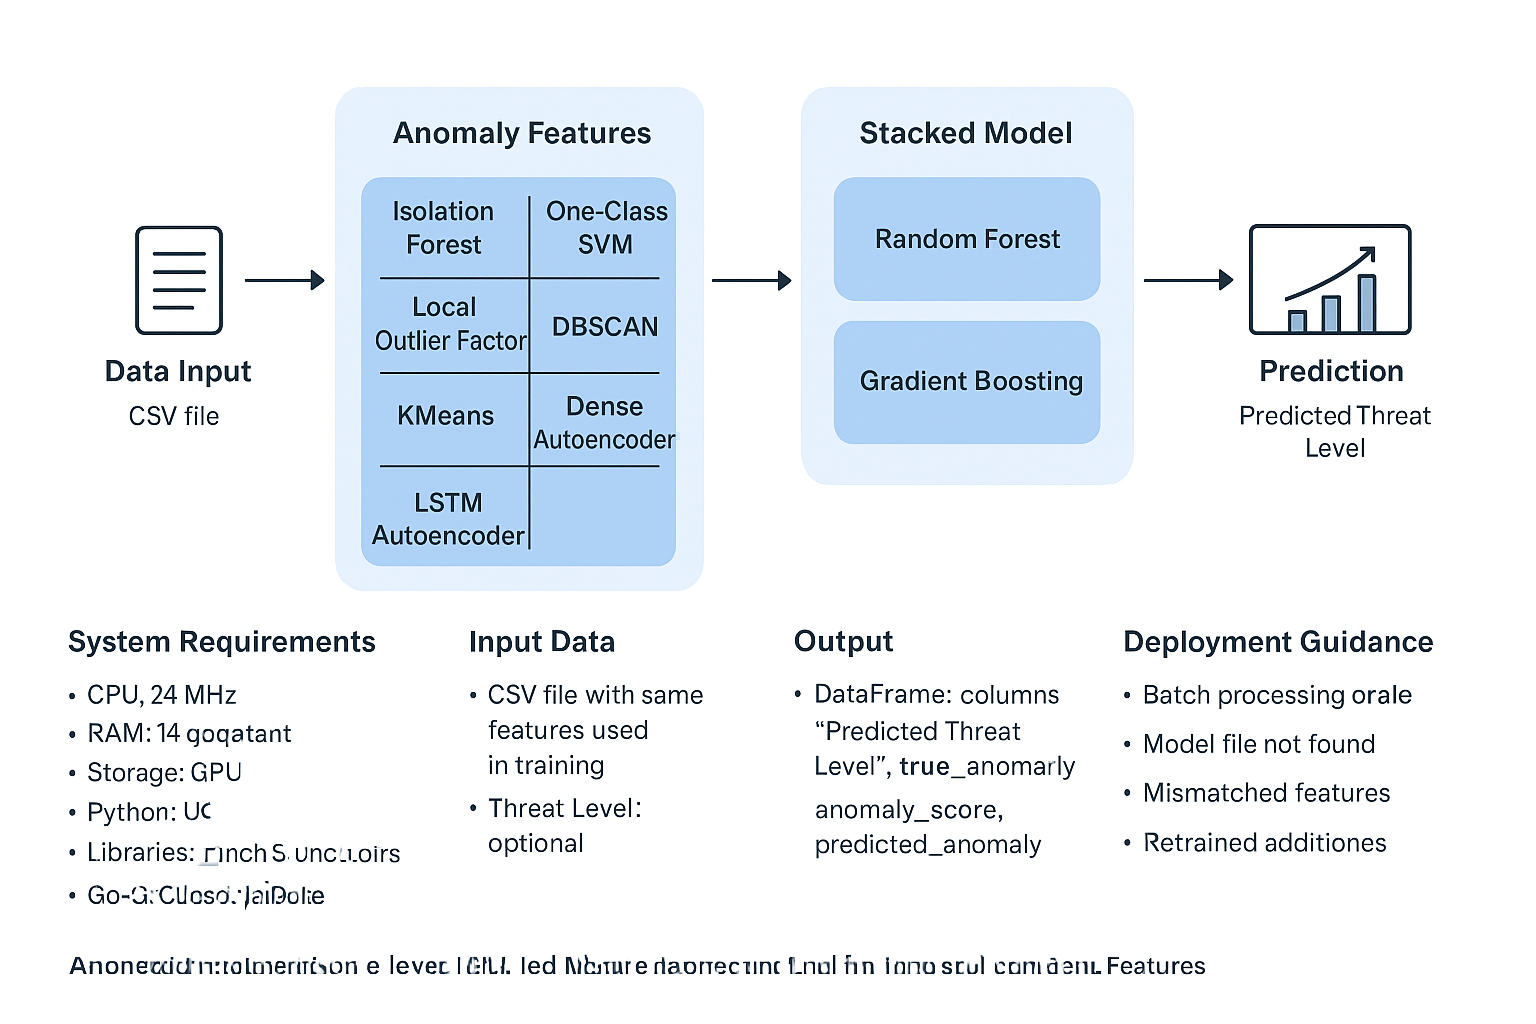

In [ ]:
!git clone https://github.com/atsuvovor/CyberThreat_Insight.git 2>/dev/null
%run /content/CyberThreat_Insight/production/stacked_ad_classifier_prod.py